# EE499 Final Project
# Premier League Predictor
Hojeong Lee and Nate Chism

In [37]:
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from autograd import grad 
from autograd import hessian
import math
import copy
import pandas as pd
import sys
import time
from IPython.display import clear_output
readDataPath = './readData/'
sys.path.append('./')

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifier
from sklearn import svm 
from sklearn import metrics

In [38]:
season_data = pd.read_csv('./readData/df_full_premierleague.csv')
season_csv_to_array = np.array(season_data)
# print(range(0, len(house_csv_to_array) -1))
print(season_csv_to_array.shape)
print(season_csv_to_array)

(4070, 114)
[[0 'https://www.premierleague.com/match/7186' '10/11' ... 0.78 -4.0 55.6]
 [1 'https://www.premierleague.com/match/7404' '10/11' ... 0.32 17.0 60.2]
 [2 'https://www.premierleague.com/match/7255' '10/11' ... 0.38 9.0 66.7]
 ...
 [4067 'https://www.premierleague.com/match/59178' '20/21' ... 0.69 4.0
  64.1]
 [4068 'https://www.premierleague.com/match/59182' '20/21' ... 0.42 6.0
  54.2]
 [4069 'https://www.premierleague.com/match/59052' '20/21' ... 0.87 5.0
  71.1]]


In [39]:
# 2, 4, 5, 6, 8 - 31, 38 - 49, 56  
print(season_csv_to_array[5][100])

nan


In [40]:
i, j = season_csv_to_array.shape
print(i)
print(j)
match_target_scores = np.zeros((i,3))
# match_teams = np.array((i, 3))
for it_1 in range(0, i):
    # store game unique id
    match_target_scores[it_1][0] = season_csv_to_array[it_1][0]
    #store game unique id, home team, away team
    # match_teams[it_1][0] = season_csv_to_array[it_1][0]
    # match_teams[it_1][1] = season_csv_to_array[it_1][4]
    # match_teams[it_1][2] = season_csv_to_array[it_1][5]
    if season_csv_to_array[it_1][34] > 0:
        match_target_scores[it_1][1] = 1
    elif season_csv_to_array[it_1][34] < 0:
        match_target_scores[it_1][1] = -1
    else:
        match_target_scores[it_1][1] = 0

print(match_target_scores[678])

4070
114
[678.  -1.   0.]


In [41]:
season_data_cleaned = np.zeros((i, 102))

# print(season_csv_to_array[5])
season_csv_to_array[pd.isnull(season_csv_to_array)] = 0
# print(season_csv_to_array[5])
# 2, 4, 5, 6, 8 - 31, 38 - 49, 56  
for it in range(0, i):
    ct = 0
    for it2 in range(0, j):
        
        # if(np.isnan(season_csv_to_array[it][it2])):
        #     print(season_csv_to_array[it][it2])

        if it2 not in [1, 2, 3, 4, 5, 6, 7, 32, 33, 34, 35, 36, 37]:
            season_data_cleaned[it][ct] = season_csv_to_array[it][it2]
            # print(ct)
            ct = ct + 1

        elif it2 == 2:
            season_number = (int)(season_csv_to_array[it][it2][0] + season_csv_to_array[it][it2][1])
            season_data_cleaned[it][ct] = season_number
            ct = ct + 1

        
        

# print(season_data_cleaned)
print(season_data_cleaned[5])


[  5.   10.   15.    5.    9.    4.  609.   65.6   0.   19.    4.   23.
 820.    2.   32.    3.    7.    0.  313.   34.4   0.    9.    4.   21.
 527.    2.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0. ]


In [42]:
print("it: ", it, " ct: ", ct, " it2: ", it2)

it:  4069  ct:  102  it2:  113


In [43]:
print(season_data_cleaned[4000][1])

20.0


In [44]:
season_data_cleaned[123][0]

123.0

In [45]:
seasons_train = np.zeros((3419, 102))
season_18 = np.zeros((380, 102))
season_19 = np.zeros((380, 102))

Y_train = np.zeros((3419,))
Y_test1 = np.zeros((380,))
Y_test2 = np.zeros((380,))

ct1 = 0
ct2 = 0
ct3 = 0
for it in range(0, i):
    target_index = season_data_cleaned[it][0]
    if season_data_cleaned[it][1] not in [18, 19]:
        seasons_train[ct1] = season_data_cleaned[it]
        Y_train[ct1] = match_target_scores[it][1]
        ct1 = ct1 + 1
    elif season_data_cleaned[it][1] == 18:
        season_18[ct2] = season_data_cleaned[it]
        Y_test1[ct2] = match_target_scores[it][1]
        ct2 = ct2 + 1
        # print(it)
    elif season_data_cleaned[it][1] == 19:
        season_19[ct3] = season_data_cleaned[it]
        Y_test2[ct3] = match_target_scores[it][1]
        ct3 = ct3 + 1
        # print(it)
    else:
        print('THIS SHOULD NEVER HAPPEN')

# Normalization

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

print(seasons_train.shape)
print(season_18.shape)
print(season_19.shape)

norm = MinMaxScaler(feature_range=(0,2)).fit(seasons_train)
seasons_train_normalized = norm.transform(seasons_train)
season_18_normalized = norm.transform(season_18)
season_19_normalized = norm.transform(season_19)


# seasons_train_normalized = preprocessing.normalize(X=seasons_train, norm='max')
# season_18_normalized = preprocessing.normalize(X=season_18, norm='max')
# season_19_normalized = preprocessing.normalize(X=season_19, norm='max')

scaler = StandardScaler().fit(seasons_train)
seasons_train_scaled = scaler.transform(seasons_train)
season_18_scaled = scaler.transform(season_18)
season_19_scaled = scaler.transform(season_19)

(3419, 102)
(380, 102)
(380, 102)


In [47]:
# ideas: 
    # normalize based on different probabilities
        #USE X*w0, X*w1, X*w2 for the 3 probabilities
    # train on 3 batches of 800
    # create a validation set to use for comparing models

In [48]:
# X_train = seasons_train
# X_test1 = season_18
# X_test2 = season_19

X_train = seasons_train_normalized
X_test1 = season_18_normalized
X_test2 = season_19_normalized

# X_train = seasons_train_scaled
# X_test1 = season_18_scaled
# X_test2= season_19_scaled

In [49]:
#BEST SO FAR
log_reg_clf = LogisticRegression(multi_class='ovr', random_state = 0, max_iter=1000, solver = 'newton-cg').fit(X_train, Y_train)

print('Logistic Regression (Newton)')
print('Score train: ', log_reg_clf.score(X_train, Y_train))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Logistic Regression (Newton)
Score train:  0.6832407136589647
Score test 1:  0.7105263157894737
Score test 2:  0.6210526315789474


In [50]:
# #model 1: Perceptron

# perc_clf = Perceptron(alpha= .0001, tol=1e-3, random_state=859)
# perc_clf.fit(X_train, Y_train)
# Perceptron()

# print('Score: ', perc_clf.score(X_train, Y_train))

In [51]:
# perc_clf.score(X_train, Y_train)

In [52]:
# score_hist = []
# for it in range(0, 1000):
#     perc_clf = Perceptron(alpha= .0001, tol=1e-3, random_state=it)
#     perc_clf.fit(X_train, Y_train)
#     Perceptron()
#     score_hist.append(perc_clf.score(X_train, Y_train))
                      
# print('Max score: ', max(score_hist))

In [53]:
# max_value_seed = max(score_hist)
# max_index_seed = score_hist.index(max_value_seed)
# print(max_index_seed)

In [54]:
# alpha_values = []
# val = 0.0001
# for i in range(0, 10000):
#     alpha_values.append(val)
#     val = val + 0.0001

In [55]:
# score_hist = []
# for it in alpha_values:
#     perc_clf = Perceptron(alpha= it, tol=1e-3, random_state=max_index_seed)
#     perc_clf.fit(X_train, Y_train)
#     Perceptron()
#     score_hist.append(perc_clf.score(X_train, Y_train))
             
# print('Max score: ', max(score_hist))
# max_value_alpha = max(score_hist)
# max_index_alpha = score_hist.index(max_value_alpha)
# print(max_index_alpha)

In [56]:
# print('Max score: ', max(score_hist))
# max_value_alpha = max(score_hist)
# max_index_alpha = score_hist.index(max_value_alpha)
# print(max_index_alpha)

In [57]:
perc_clf = Perceptron(alpha= .0001, tol=1e-3, random_state=859)
perc_clf.fit(X_train, Y_train)
Perceptron()

print('Perceptron')
print('Score train: ', perc_clf.score(X_train, Y_train))
print('Score test 1: ', perc_clf.score(X_test1, Y_test1))
print('Score test 2: ', perc_clf.score(X_test2, Y_test2))

Perceptron
Score train:  0.6566247440772156
Score test 1:  0.7
Score test 2:  0.618421052631579


In [58]:
log_reg_clf = LogisticRegression(multi_class='ovr', random_state = 0, max_iter=10000, solver = 'liblinear').fit(X_train, Y_train)

print('Logistic Regression (liblinear)')
print('Score train: ', log_reg_clf.score(X_train, Y_train))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Logistic Regression (liblinear)
Score train:  0.6817782977478795
Score test 1:  0.7
Score test 2:  0.6236842105263158


In [59]:
# score_hist = []
# for state_num in range(0, 1000):
#     log_reg_clf = LogisticRegression(multi_class='ovr', random_state = state_num, max_iter=10000, solver = 'liblinear').fit(X_train, Y_train)

#     score_hist.append(log_reg_clf.score(X_train, Y_train))

# print('Max score: ', max(score_hist))
# max_value_seed = max(score_hist)
# max_index_seed = score_hist.index(max_value_seed)
# print('Best random_state = ', max_index_seed)

In [60]:
# print('Max score: ', max(score_hist))
# max_value_seed = max(score_hist)
# max_index_seed = score_hist.index(max_value_seed)
# print('Best random_state = ', max_index_seed)
# print(len(score_hist))

# Start Here

In [61]:
#BEST SO FAR
log_reg_clf = LogisticRegression(multi_class='ovr', random_state = 0, max_iter=10000, solver = 'newton-cg').fit(X_train, Y_train)

print('Logistic Regression (Newton)')
print('Score train: ', log_reg_clf.score(X_train, Y_train))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Logistic Regression (Newton)
Score train:  0.6832407136589647
Score test 1:  0.7105263157894737
Score test 2:  0.6210526315789474


In [62]:
print('classes: ', log_reg_clf.classes_)

print(X_test1[0].shape)
print(log_reg_clf.coef_[0].shape)
print('1: ', X_test1[41].T@log_reg_clf.coef_[0])
print('2: ', X_test1[41].T@log_reg_clf.coef_[1])
print('3: ', X_test1[41].T@log_reg_clf.coef_[2])
print('predict probabilities: ', log_reg_clf.predict_proba(X_test1)[41])
predictions1 = log_reg_clf.predict(X_test1)
predictions2 = log_reg_clf.predict(X_test2)


classes:  [-1.  0.  1.]
(102,)
(102,)
1:  3.1352069682955155
2:  -5.931276362414783
3:  5.273688947526151
predict probabilities:  [0.12824196 0.24584345 0.62591459]


In [63]:
print('Accuracy Score for season 1: ', metrics.accuracy_score(predictions1, Y_test1))
print('Balanced Accuracy Score for season 1: ', metrics.balanced_accuracy_score(predictions1, Y_test1))
print('Accuracy Score for season 2: ', metrics.accuracy_score(predictions2, Y_test2))
print('Balanced Accuracy Score for season 2: ', metrics.balanced_accuracy_score(predictions2, Y_test2))

Accuracy Score for season 1:  0.7105263157894737
Balanced Accuracy Score for season 1:  0.6081704260651629
Accuracy Score for season 2:  0.6210526315789474
Balanced Accuracy Score for season 2:  0.5501748251748252


In [64]:
prob1 = log_reg_clf.predict_proba(X_test1)
temp0 = prob1[0][0]
temp1 = prob1[0][1]
temp2 = prob1[0][2]
print('==========')

rand_num = np.random.random()

print(temp0)
print(temp1)
print(temp2)

thresh0 = temp0
thresh1 = temp0+temp1
thresh2 = temp0 + temp1 + temp2
print('==========')
print(thresh0, ',', thresh1, ',', thresh2)
print('==========')
if rand_num < thresh0:
    print(rand_num)
    print('-1')
elif thresh0 < rand_num < thresh1:
    print(rand_num)
    print('0')
else:
    print(rand_num)
    print('+1')



0.07832830965045158
0.07917630374450702
0.8424953866050413
0.07832830965045158 , 0.15750461339495858 , 0.9999999999999999
0.6030429810112887
+1


In [65]:
print(np.random.random())

0.28872916330579157


In [66]:
prob1 = log_reg_clf.predict_proba(X_test1)
prob2 = log_reg_clf.predict_proba(X_test2)

max_pred1 = np.zeros(len(X_test1))
random_pred1 = np.zeros(len(X_test1))
max_pred2 = np.zeros(len(X_test2))
random_pred2 = np.zeros(len(X_test2))

for it in range(0, len(X_test1)):
    max_pred1[it] = np.max(predictions1[it])
    temp0 = prob1[it][0]
    temp1 = prob1[it][1]
    temp2 = prob1[it][2]
    pick = np.random.random()

    thresh0 = temp0
    thresh1 = temp0+temp1
    thresh2 = temp0 + temp1 + temp2
    # print('==========')
    # print(thresh0, ',', thresh1, ',', thresh2)
    # print('==========')
    if pick < thresh0:
        # print(rand_num)
        # print('-1')
        random_pred1[it] = -1
    elif thresh0 < pick < thresh1:
        # print(rand_num)
        # print('0')
        random_pred1[it] = 0
    else:
        # print(rand_num)
        # print('+1')
        random_pred1[it] = 1

for it in range(0, len(X_test2)):
    max_pred2[it] = np.max(predictions2[it])
    temp0 = prob2[it][0]
    temp1 = prob2[it][1]
    temp2 = prob2[it][2]
    pick = np.random.random()

    thresh0 = temp0
    thresh1 = temp0+temp1
    thresh2 = temp0 + temp1 + temp2
    # print('==========')
    # print(thresh0, ',', thresh1, ',', thresh2)
    # print('==========')
    if pick < thresh0:
        # print(rand_num)
        # print('-1')
        random_pred2[it] = -1
    elif thresh0 < pick < thresh1:
        # print(rand_num)
        # print('0')
        random_pred2[it] = 0
    else:
        # print(rand_num)
        # print('+1')
        random_pred2[it] = 1

model_pred1 = log_reg_clf.predict(X_test1)
model_pred2 = log_reg_clf.predict(X_test2)

In [67]:
print('Model Accuracy Score for season 1:  ', metrics.accuracy_score(model_pred1, Y_test1))
print('Max Accuracy Score for season 1:    ', metrics.accuracy_score(max_pred1, Y_test1))
print('Random Accuracy Score for season 1: ', metrics.accuracy_score(random_pred1, Y_test1))
print('\n')
print('Model Accuracy Score for season 2:  ', metrics.accuracy_score(model_pred2, Y_test2))
print('Max Accuracy Score for season 2:    ', metrics.accuracy_score(max_pred2, Y_test2))
print('Random Accuracy Score for season 2: ', metrics.accuracy_score(random_pred2, Y_test2))


Model Accuracy Score for season 1:   0.7105263157894737
Max Accuracy Score for season 1:     0.7105263157894737
Random Accuracy Score for season 1:  0.5868421052631579


Model Accuracy Score for season 2:   0.6210526315789474
Max Accuracy Score for season 2:     0.6210526315789474
Random Accuracy Score for season 2:  0.531578947368421


In [68]:
# even size classes
count = 0
count1 = 0
count2 = 0
big_ct = 0
X_train_trunc = np.zeros((2400, 102))
Y_train_trunc = np.zeros(2400)


for it in range(len(Y_train)):
    index = it#np.random.randint(0, 3419)
    if Y_train[it] == 0:
        if count < 800:
            X_train_trunc[big_ct] = X_train[index]
            Y_train_trunc[big_ct] = Y_train[index]
            big_ct = big_ct + 1
        count = count + 1
    if Y_train[it] == 1:
        if count1 < 800:
            X_train_trunc[big_ct] = X_train[index]
            Y_train_trunc[big_ct] = Y_train[index]
            big_ct = big_ct + 1
        count1 = count1 + 1
    if Y_train[it] == -1:
        if count2 < 800:
            X_train_trunc[big_ct] = X_train[index]
            Y_train_trunc[big_ct] = Y_train[index]
            big_ct = big_ct + 1
        count2 = count2 + 1

print(count)
print(count1)
print(count2)
print(count + count1 + count2)
print(len(Y_train))

count = 0
count1 = 0
count2 = 0

for it in range(len(Y_train_trunc)):
    if Y_train_trunc[it] == 0:
        # if count < 800:
        #     X_train_trunc[big_ct] = X_train[it]
        #     Y_train_trunc[big_ct] = Y_train[it]
        #     big_ct = big_ct + 1
        count = count + 1
    if Y_train_trunc[it] == 1:
        # if count1 < 800:
        #     X_train_trunc[big_ct] = X_train[it]
        #     Y_train_trunc[big_ct] = Y_train[it]
        #     big_ct = big_ct + 1
        count1 = count1 + 1
    if Y_train_trunc[it] == -1:
        # if count2 < 800:
        #     X_train_trunc[big_ct] = X_train[it]
        #     Y_train_trunc[big_ct] = Y_train[it]
        #     big_ct = big_ct + 1
        count2 = count2 + 1

print('==========')
print(count)
print(count1)
print(count2)
print(count + count1 + count2)
print(len(Y_train_trunc))

946
1482
991
3419
3419
800
800
800
2400
2400


In [69]:
# even size classses
log_reg_clf = LogisticRegression(multi_class='ovr', random_state = 0, max_iter=10000, solver = 'newton-cg').fit(X_train_trunc, Y_train_trunc)

print('Logistic Regression (Newton)')
print('Score train: ', log_reg_clf.score(X_train_trunc, Y_train_trunc))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Logistic Regression (Newton)
Score train:  0.69
Score test 1:  0.3473684210526316
Score test 2:  0.35789473684210527


the rankings

In [70]:
#BEST SO FAR
log_reg_clf = LogisticRegression(multi_class='ovr', random_state = 0, max_iter=10000, solver = 'newton-cg').fit(X_train, Y_train)

print('Logistic Regression (Newton)')
print('Score train: ', log_reg_clf.score(X_train, Y_train))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Logistic Regression (Newton)
Score train:  0.6832407136589647
Score test 1:  0.7105263157894737
Score test 2:  0.6210526315789474


In [71]:
y_pred1 = log_reg_clf.predict(X_test1)
y_pred2 = log_reg_clf.predict(X_test2)

In [72]:
# retrieve and sort coefficients
coefficients = abs(log_reg_clf.coef_)
sorted_coefficients = sorted(enumerate(coefficients), key=lambda x: x[1], reverse=True)

# print the most influential parameters
for i, coef in sorted_coefficients[:3]:
    print(f"Parameter {i}: {coef}")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
svm_clf = svm.SVC(gamma='scale', degree=1, random_state=0, kernel='poly').fit(X_train, Y_train)

print('SVM SVC')
# print('degree = ', deg)
print('Score train: ', svm_clf.score(X_train, Y_train))
print('Score test 1: ', svm_clf.score(X_test1, Y_test1))
print('Score test 2: ', svm_clf.score(X_test2, Y_test2))

SVM SVC
Score train:  0.6829482304767476
Score test 1:  0.7157894736842105
Score test 2:  0.6394736842105263


In [ ]:
y_pred1 = svm_clf.predict(X_test1)
y_pred2 = svm_clf.predict(X_test2)

# 2018-2019

In [ ]:
standing18 = {}
indexofteams = []
for i in range(len(season_csv_to_array)):
    season_number = (int)(season_csv_to_array[i][2][0] + season_csv_to_array[i][2][1])
    # print(season_number)
    if season_number == 18:
        indexofteams.append(i)
        if (season_csv_to_array[i][4]) in standing18:
            standing18[season_csv_to_array[i][4]] = 0
            # print(season_csv_to_array[i][4])
        else:
            standing18[season_csv_to_array[i][4]] = 0

In [ ]:
it = 1
for key in standing18:
    # print(it)
    print(key)
    it = it + 1

Manchester United
Leicester City
Wolverhampton Wanderers
Cardiff City
West Ham United
Liverpool
Everton
Southampton
Brighton and Hove Albion
Arsenal
AFC Bournemouth
Manchester City
Watford
Crystal Palace
Chelsea
Burnley
Tottenham Hotspur
Huddersfield Town
Newcastle United
Fulham


In [ ]:
i= 3039
for ind in range(len(y_pred1)):
    if y_pred1[ind] == 1:
        standing18[season_csv_to_array[i][4]] += 3
    elif y_pred1[ind] == 0:
        standing18[season_csv_to_array[i][4]] += 1
        standing18[season_csv_to_array[i][5]] += 1
    else:
        standing18[season_csv_to_array[i][5]] += 3
    i=i+1

In [ ]:
sorted_dict18 = dict(sorted(standing18.items(), key=lambda x: x[1], reverse=True))
print(sorted_dict18)
ct = 0
print('2018-2019 Premier League Predicted Standings')
for it in sorted_dict18:
    print(ct, '\t', it, ':', sorted_dict18[it])
    ct = ct+1

{'Manchester City': 106, 'Liverpool': 93, 'Chelsea': 89, 'Manchester United': 71, 'Tottenham Hotspur': 71, 'Wolverhampton Wanderers': 63, 'Everton': 63, 'Leicester City': 61, 'Arsenal': 60, 'Southampton': 59, 'AFC Bournemouth': 59, 'Watford': 50, 'Newcastle United': 45, 'Crystal Palace': 44, 'West Ham United': 39, 'Brighton and Hove Albion': 39, 'Fulham': 34, 'Burnley': 30, 'Cardiff City': 24, 'Huddersfield Town': 18}
2018-2019 Premier League Predicted Standings
0 	 Manchester City : 106
1 	 Liverpool : 93
2 	 Chelsea : 89
3 	 Manchester United : 71
4 	 Tottenham Hotspur : 71
5 	 Wolverhampton Wanderers : 63
6 	 Everton : 63
7 	 Leicester City : 61
8 	 Arsenal : 60
9 	 Southampton : 59
10 	 AFC Bournemouth : 59
11 	 Watford : 50
12 	 Newcastle United : 45
13 	 Crystal Palace : 44
14 	 West Ham United : 39
15 	 Brighton and Hove Albion : 39
16 	 Fulham : 34
17 	 Burnley : 30
18 	 Cardiff City : 24
19 	 Huddersfield Town : 18


In [ ]:
actual_values_18 = {
            'Manchester City' : (1, 98),
            'Liverpool' : (2, 97),
            'Chelsea' : (3, 72),
            'Tottenham Hotspur' : (4, 71),
            'Arsenal' : (5, 70),
            'Manchester United' : (6, 66),
            'Wolverhampton Wanderers' : (7, 57),
            'Everton' : (8, 54),
            'Leicester City' : (9, 52),
            'West Ham United' : (10, 52),
            'Watford' : (11, 50),
            'Crystal Palace' : (12, 49),
            'Newcastle United' : (13, 45),
            'AFC Bournemouth' : (14, 45),
            'Burnley' : (15, 40),
            'Southampton' : (16, 39),
            'Brighton and Hove Albion' : (17, 36),
            'Cardiff City' : (18, 34),
            'Fulham' : (19, 26),
            'Huddersfield Town': (20, 16)
}

In [ ]:
max_len_key = max(len(k) for k in sorted_dict18.keys())  # get the maximum length of keys
max_len_value = max(len(str(v)) for v in sorted_dict18.values())  # get the maximum length of values
place = 1

print('2018-2019 Premier League Season')
# print('Logistic Regression, OVR, Newton-CG')
print('')
print('# \t Team \t\t\t\t Points (pred)\tPoints (real)\tPoints Diff\tPlace Diff')
print('__________________________________________________________________________________________________')
for key, value in sorted_dict18.items():
    if place < 10:
        print(place, ' :\t', "{:{key_width}}  \t {:{value_width}} \t\t {:{value_width}}\t\t {:{value_width}}\t\t {:{value_width}}".format(key, value, actual_values_18[key][1], value - actual_values_18[key][1], actual_values_18[key][0] - place, key_width=max_len_key, value_width=max_len_value))
    else:
        print(place, ':\t', "{:{key_width}}  \t {:{value_width}} \t\t {:{value_width}}\t\t {:{value_width}}\t\t {:{value_width}}".format(key, value, actual_values_18[key][1], value - actual_values_18[key][1], actual_values_18[key][0] - place, key_width=max_len_key, value_width=max_len_value))
    place = place + 1

2018-2019 Premier League Season

# 	 Team 				 Points (pred)	Points (real)	Points Diff	Place Diff
__________________________________________________________________________________________________
1  :	 Manchester City           	 106 		  98		   8		   0
2  :	 Liverpool                 	  93 		  97		  -4		   0
3  :	 Chelsea                   	  89 		  72		  17		   0
4  :	 Manchester United         	  71 		  66		   5		   2
5  :	 Tottenham Hotspur         	  71 		  71		   0		  -1
6  :	 Wolverhampton Wanderers   	  63 		  57		   6		   1
7  :	 Everton                   	  63 		  54		   9		   1
8  :	 Leicester City            	  61 		  52		   9		   1
9  :	 Arsenal                   	  60 		  70		 -10		  -4
10 :	 Southampton               	  59 		  39		  20		   6
11 :	 AFC Bournemouth           	  59 		  45		  14		   3
12 :	 Watford                   	  50 		  50		   0		  -1
13 :	 Newcastle United          	  45 		  45		   0		   0
14 :	 Crystal Palace            	  44 		  49		  -5		  -2
15 :	

In [ ]:
champions_leage_pred = []
champions_league_real = ['Manchester City', 'Liverpool', 'Chelsea', 'Tottenham Hotspur']
relegation_pred = []
relegation_real = ['Cardiff City', 'Fulham', 'Huddersfield Town']

place = 1
for key, value in sorted_dict18.items():
    if place < 5:
        champions_leage_pred.append(key)
    if place > 17:
        relegation_pred.append(key)
    place = place + 1
print('2018-2019 Premier League Season')
print('Champion League Qualification')
print('Predicted Teams \t\t Actual Teams')
print('_________________________________________________')
for it in range(0, len(champions_leage_pred)):
    print("{:{key_width}}\t{:{key_width}}".format(champions_leage_pred[it], champions_league_real[it], key_width=max_len_key))
print('\n')
print('Relegation Battle')
print('Predicted Teams \t\t Actual Teams')
print('_________________________________________________')
for it in range(len(relegation_pred)):
    print("{:{key_width}}\t{:{key_width}}".format(relegation_pred[it], relegation_real[it], key_width=max_len_key))

2018-2019 Premier League Season
Champion League Qualification
Predicted Teams 		 Actual Teams
_________________________________________________
Manchester City         	Manchester City         
Liverpool               	Liverpool               
Chelsea                 	Chelsea                 
Manchester United       	Tottenham Hotspur       


Relegation Battle
Predicted Teams 		 Actual Teams
_________________________________________________
Burnley                 	Cardiff City            
Cardiff City            	Fulham                  
Huddersfield Town       	Huddersfield Town       


# 2019-2020

In [ ]:
standing19 = {}
indexofteams = []
for i in range(len(season_csv_to_array)):
    season_number = (int)(season_csv_to_array[i][2][0] + season_csv_to_array[i][2][1])
    if season_number == 19:
        indexofteams.append(i)
        if (season_csv_to_array[i][4]) in standing19:
            standing19[season_csv_to_array[i][4]] = 0
            # print(season_csv_to_array[i][4])
        else:
            standing19[season_csv_to_array[i][4]] = 0

In [ ]:
i= 3419
for ind in range(len(y_pred2)):
    if y_pred2[ind] == 1:
        standing19[season_csv_to_array[i][4]] += 3
    elif y_pred2[ind] == 0:
        standing19[season_csv_to_array[i][4]] += 1
        standing19[season_csv_to_array[i][5]] += 1
    else:
        standing19[season_csv_to_array[i][5]] += 3
    i=i+1

In [ ]:
sorted_dict19 = dict(sorted(standing19.items(), key=lambda x: x[1], reverse=True))
print(sorted_dict19)
ct = 0
print('2019-2020 Premier League Predicted Standings')
for it in sorted_dict19:
    print(ct, '\t', it, ':', sorted_dict19[it])
    ct = ct+1

{'Liverpool': 93, 'Manchester City': 88, 'Manchester United': 84, 'Chelsea': 74, 'Leicester City': 71, 'Everton': 64, 'Wolverhampton Wanderers': 61, 'Tottenham Hotspur': 58, 'Brighton and Hove Albion': 54, 'Sheffield United': 52, 'West Ham United': 52, 'Burnley': 51, 'Aston Villa': 48, 'Southampton': 46, 'Newcastle United': 43, 'Arsenal': 43, 'Crystal Palace': 34, 'AFC Bournemouth': 34, 'Norwich City': 33, 'Watford': 31}
2019-2020 Premier League Predicted Standings
0 	 Liverpool : 93
1 	 Manchester City : 88
2 	 Manchester United : 84
3 	 Chelsea : 74
4 	 Leicester City : 71
5 	 Everton : 64
6 	 Wolverhampton Wanderers : 61
7 	 Tottenham Hotspur : 58
8 	 Brighton and Hove Albion : 54
9 	 Sheffield United : 52
10 	 West Ham United : 52
11 	 Burnley : 51
12 	 Aston Villa : 48
13 	 Southampton : 46
14 	 Newcastle United : 43
15 	 Arsenal : 43
16 	 Crystal Palace : 34
17 	 AFC Bournemouth : 34
18 	 Norwich City : 33
19 	 Watford : 31


In [ ]:
actual_values_19 = {
            'Liverpool' : (1, 99),
            'Manchester City' : (2, 81),
            'Manchester United' : (3, 66),
            'Chelsea' : (4, 66),
            'Leicester City' : (5, 62),
            'Tottenham Hotspur' : (6, 59),
            'Wolverhampton Wanderers' : (7, 59),
            'Arsenal' : (8, 56),
            'Sheffield United' : (9, 54),
            'Burnley' : (10, 54),
            'Southampton' : (11, 52),
            'Everton' : (12, 49),
            'Newcastle United' : (13, 44),
            'Crystal Palace' : (14, 43),
            'Brighton and Hove Albion' : (15, 41),
            'West Ham United' : (16, 39),
            'Aston Villa' : (17, 35),
            'AFC Bournemouth' : (18, 34),
            'Watford' : (19, 34),
            'Norwich City' : (20, 21),
}

In [ ]:
max_len_key = max(len(k) for k in sorted_dict19.keys())  # get the maximum length of keys
max_len_value = max(len(str(v)) for v in sorted_dict19.values())  # get the maximum length of values
place = 1

print('2019-2020 Premier League Season')
print('# \t Team \t\t\t\t Points (pred)\tPoints (real)\tPoints Diff\tPlace Diff')
print('__________________________________________________________________________________________________')
for key, value in sorted_dict19.items():
    if place < 10:
        print(place, ' :\t', "{:{key_width}}  \t {:{value_width}} \t\t {:{value_width}}\t\t {:{value_width}}\t\t {:{value_width}}".format(key, value, actual_values_19[key][1], value - actual_values_19[key][1], actual_values_19[key][0] - place, key_width=max_len_key, value_width=max_len_value))
    else:
        print(place, ':\t', "{:{key_width}}  \t {:{value_width}} \t\t {:{value_width}}\t\t {:{value_width}}\t\t {:{value_width}}".format(key, value, actual_values_19[key][1], value - actual_values_19[key][1], actual_values_19[key][0] - place, key_width=max_len_key, value_width=max_len_value))
    place = place + 1

2019-2020 Premier League Season
# 	 Team 				 Points (pred)	Points (real)	Points Diff	Place Diff
__________________________________________________________________________________________________
1  :	 Liverpool                 	 93 		 99		 -6		  0
2  :	 Manchester City           	 88 		 81		  7		  0
3  :	 Manchester United         	 84 		 66		 18		  0
4  :	 Chelsea                   	 74 		 66		  8		  0
5  :	 Leicester City            	 71 		 62		  9		  0
6  :	 Everton                   	 64 		 49		 15		  6
7  :	 Wolverhampton Wanderers   	 61 		 59		  2		  0
8  :	 Tottenham Hotspur         	 58 		 59		 -1		 -2
9  :	 Brighton and Hove Albion  	 54 		 41		 13		  6
10 :	 Sheffield United          	 52 		 54		 -2		 -1
11 :	 West Ham United           	 52 		 39		 13		  5
12 :	 Burnley                   	 51 		 54		 -3		 -2
13 :	 Aston Villa               	 48 		 35		 13		  4
14 :	 Southampton               	 46 		 52		 -6		 -3
15 :	 Newcastle United          	 43 		 44		 -1		 -2
16 :	 Ars

In [ ]:
champions_leage_pred = []
champions_league_real = ['Liverpool', 'Manchester City', 'Manchester United', 'Chelsea']
relegation_pred = []
relegation_real = ['AFC Bournemouth', 'Watford', 'Norwich City']

place = 1
for key, value in sorted_dict19.items():
    if place < 5:
        champions_leage_pred.append(key)
    if place > 17:
        relegation_pred.append(key)
    place = place + 1
print('2019-2020 Premier League Season')
print('Champion League Qualification')
print('Predicted Teams \t\t Actual Teams')
print('_________________________________________________')
for it in range(0, len(champions_leage_pred)):
    print("{:{key_width}}\t{:{key_width}}".format(champions_leage_pred[it], champions_league_real[it], key_width=max_len_key))
print('\n')
print('Relegation Battle')
print('Predicted Teams \t\t Actual Teams')
print('_________________________________________________')
for it in range(len(relegation_pred)):
    print("{:{key_width}}\t{:{key_width}}".format(relegation_pred[it], relegation_real[it], key_width=max_len_key))

2019-2020 Premier League Season
Champion League Qualification
Predicted Teams 		 Actual Teams
_________________________________________________
Liverpool               	Liverpool               
Manchester City         	Manchester City         
Manchester United       	Manchester United       
Chelsea                 	Chelsea                 


Relegation Battle
Predicted Teams 		 Actual Teams
_________________________________________________
AFC Bournemouth         	AFC Bournemouth         
Norwich City            	Watford                 
Watford                 	Norwich City            


# End Here

In [ ]:
log_reg_clf = LogisticRegressionCV(multi_class='ovr', random_state = 13, max_iter=1000, solver = 'liblinear').fit(X_train, Y_train)

print('Logistic RegressionCV (newton-cholesky)')
print('Score train: ', log_reg_clf.score(X_train, Y_train))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Logistic RegressionCV (newton-cholesky)
Score train:  0.674758701374671
Score test 1:  0.7026315789473684
Score test 2:  0.6394736842105263


In [ ]:
log_reg_clf = RidgeClassifier(alpha=0.001, random_state = 13, max_iter=1000, solver = 'lbfgs', positive=True).fit(X_train, Y_train)

print('Ridge Classifier (auto)')
print('Score train: ', log_reg_clf.score(X_train, Y_train))
print('Score test 1: ', log_reg_clf.score(X_test1, Y_test1))
print('Score test 2: ', log_reg_clf.score(X_test2, Y_test2))

Ridge Classifier (auto)
Score train:  0.6390757531441942
Score test 1:  0.6605263157894737
Score test 2:  0.6368421052631579


In [ ]:
score_hist = []
# nonlinear SVM
for seed in range(1, 100):
    svm_clf = svm.SVC(gamma='scale', degree=3, random_state=seed)
    svm_clf.fit(X_train, Y_train)

    score_hist.append(svm_clf.score(X_train, Y_train))



KeyboardInterrupt: 

In [ ]:
svm_clf = svm.SVC(gamma='scale', degree=2, random_state=0, kernel='poly')
svm_clf.fit(X_train, Y_train)

print('SVM SVC')
# print('degree = ', deg)
print('Score train: ', svm_clf.score(X_train, Y_train))
print('Score test 1: ', svm_clf.score(X_test1, Y_test1))
print('Score test 2: ', svm_clf.score(X_test2, Y_test2))

SVM SVC
Score train:  0.71512138052062
Score test 1:  0.7052631578947368
Score test 2:  0.6289473684210526


In [ ]:
svm_clf = svm.LinearSVC(penalty= 'l2', loss= 'hinge',random_state=seed)
svm_clf.fit(X_train, Y_train)

score_hist.append(svm_clf.score(X_train, Y_train))

print('SVM LinearSVC')
print('Score train: ', svm_clf.score(X_train, Y_train))
print('Score test 1: ', svm_clf.score(X_test1, Y_test1))
print('Score test 2: ', svm_clf.score(X_test2, Y_test2))

SVM LinearSVC
Score train:  0.6686165545481135
Score test 1:  0.7131578947368421
Score test 2:  0.6210526315789474


/Users/natechism/opt/anaconda3/envs/ee499_ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

weights = {-1:1.0, 0:1.0, -1:1.0}

train_results_hist_depth = []
test_results_hist_depth1 = []
test_results_hist_depth2 = []

for deep in range(1,20):
    rfc = RandomForestClassifier(random_state = 42, max_depth=18, criterion='gini', class_weight=weights, n_estimators=deep)
    rfc.fit(X_train, Y_train)
    y_pred_train = rfc.predict(X_train) 
    y_pred_test1 = rfc.predict(X_test1)  
    y_pred_test2 = rfc.predict(X_test2)

    train_results_hist_depth.append(metrics.balanced_accuracy_score(Y_train, y_pred_train))
    test_results_hist_depth1.append(metrics.balanced_accuracy_score(Y_test1, y_pred_test1))
    test_results_hist_depth2.append(metrics.balanced_accuracy_score(Y_test2, y_pred_test2)) 



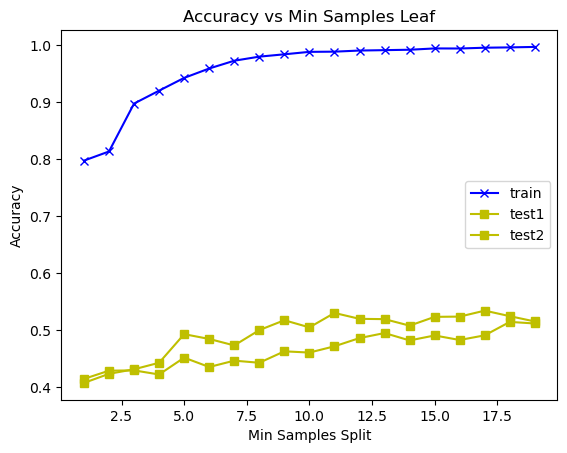

In [ ]:
plt.plot(range(1,20), train_results_hist_depth, 'xb-', label='train')
plt.plot(range(1,20), test_results_hist_depth1, 'sy-', label='test1')
plt.plot(range(1,20), test_results_hist_depth2, 'sy-', label='test2')
plt.title('Accuracy vs Min Samples Leaf')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#gradient boosting!
from sklearn.ensemble import GradientBoostingClassifier

gd_boost_clf = GradientBoostingClassifier(n_estimators=7, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)

print('GradientBoostingClassifier')
print('Score train: ', gd_boost_clf.score(X_train, Y_train))
print('Score test 1: ', gd_boost_clf.score(X_test1, Y_test1))
print('Score test 2: ', gd_boost_clf.score(X_test2, Y_test2))

GradientBoostingClassifier
Score train:  0.6408306522374964
Score test 1:  0.618421052631579
Score test 2:  0.6105263157894737


In [ ]:
# try MLPClassifier and KNeighborsClassifier

# Function

In [ ]:
def predict_season(season_num, model):
    if model == 'logReg':
        clf = LogisticRegression(multi_class='ovr', random_state = 0, max_iter=10000, solver = 'newton-cg').fit(X_train, Y_train)
    elif model == 'SVC1':
        clf = svm.SVC(gamma='scale', degree=1, random_state=0, kernel='poly').fit(X_train, Y_train)
    elif model == 'SVC2':
        clf = svm.SVC(gamma='scale', degree=2, random_state=0, kernel='poly').fit(X_train, Y_train)
    else:
        return 'No model found. Please Enter a valid model.'
    

In [ ]:
predict_season(1, 'logReg')